In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
!unzip /content/drive/MyDrive/data/ship.zip -d /content/ship

Archive:  /content/drive/MyDrive/data/ship.zip
  inflating: /content/ship/scenes/scenes/lb_1.png  
  inflating: /content/ship/scenes/scenes/lb_2.png  
  inflating: /content/ship/scenes/scenes/lb_3.png  
  inflating: /content/ship/scenes/scenes/lb_4.png  
  inflating: /content/ship/scenes/scenes/sfbay_1.png  
  inflating: /content/ship/scenes/scenes/sfbay_2.png  
  inflating: /content/ship/scenes/scenes/sfbay_3.png  
  inflating: /content/ship/scenes/scenes/sfbay_4.png  
  inflating: /content/ship/shipsnet.json  
  inflating: /content/ship/shipsnet/shipsnet/0__20150718_184300_090b__-122.35324421973536_37.772113980272394.png  
  inflating: /content/ship/shipsnet/shipsnet/0__20150718_184300_090b__-122.38458613431831_37.763521076612484.png  
  inflating: /content/ship/shipsnet/shipsnet/0__20150718_184300_090b__-122.40477488428849_37.8071040053892.png  
  inflating: /content/ship/shipsnet/shipsnet/0__20150718_184300_090b__-122.42663861582857_37.80913223576201.png  
  inflating: /content/shi

In [4]:
# common imports

import numpy as np
import json
import matplotlib.pyplot as plt

In [6]:
file = open('/content/ship/shipsnet.json')
dataset = json.load(file)
file.close()

In [7]:
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [8]:
# write data to numpy arrays
data = np.array(dataset['data']).astype('uint8')

In [9]:
data.shape

(4000, 19200)

In [10]:
# extract label data 

label_data = np.array(dataset['labels']).astype('uint8')

In [11]:
label_data.shape

(4000,)

In [12]:
# reshape data
channels = 3
width = 80
height = 80

X = data.reshape(-1, 3, width, height).transpose([0,2,3,1])
X.shape

(4000, 80, 80, 3)

(80, 80, 3)


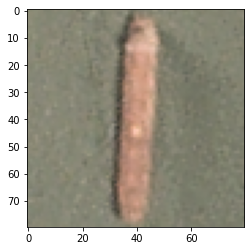

In [13]:
# check sample shape and plot
print(X[800].shape)
sample_pic = X[800]
plt.imshow(X[800])

In [14]:
type(sample_pic)

numpy.ndarray

In [15]:
from skimage import color

In [16]:
sample_pic_gr = color.rgb2gray(sample_pic)

In [17]:
sample_pic_gr.shape

(80, 80)

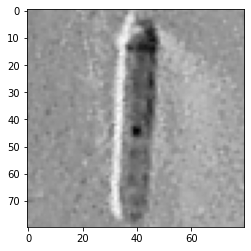

In [19]:
plt.imshow(sample_pic_gr)
plt.set_cmap('Greys')

In [20]:
# converting all images to greyscale. Output is a list

X_grey = [ color.rgb2gray(i) for i in X]

In [21]:
X_grey = np.array(X_grey)

In [22]:
X_grey.shape

(4000, 80, 80)

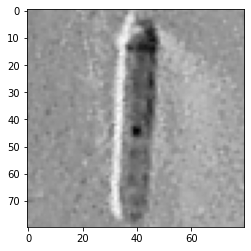

In [23]:
plt.imshow(X_grey[800])

In [24]:
label_data[800]

1

In [25]:
# Training data is a 3D matrix. Convert to a 2D matrix. 

X_grey = X_grey.reshape(len(X_grey), -1)

In [26]:
X_grey.shape

(4000, 6400)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_grey, label_data, test_size=0.2, random_state=42)

In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns

In [29]:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [30]:
xgb_clf = xgb.XGBClassifier(learning_rate=1.0, nthread=-1, max_depth=2) # test values

In [31]:
xgb_clf

XGBClassifier(learning_rate=1.0, max_depth=2, nthread=-1)

In [32]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=1.0, max_depth=2, nthread=-1)

In [33]:
predictions = xgb_clf.predict(X_test)

In [34]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.95125
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       591
           1       0.90      0.91      0.91       209

    accuracy                           0.95       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.95      0.95      0.95       800



In [35]:
print(balanced_accuracy_score(y_test, predictions,adjusted=False))
print(confusion_matrix(y_test, predictions))

0.9391713015811333
[[570  21]
 [ 18 191]]
